In [1]:
%matplotlib inline
import pandas
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from keras.utils.np_utils import to_categorical
import time
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dropout, Dense
from keras.models import Model
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Using TensorFlow backend.


Lets load the data

In [2]:
train_data = pandas.read_csv("Train.csv").sample(frac=1, random_state=int(time.time())).reset_index(drop=True)
valid_data = pandas.read_csv("Validate.csv").sample(frac=1, random_state=int(time.time())).reset_index(drop=True)

In [16]:
columns = np.array(train_data.columns.values.tolist()[1:-1])
tau=128
tau2=len(columns)
columns[tau:tau2]

array(['V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137',
       'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145',
       'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153',
       'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161',
       'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169',
       'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177',
       'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185',
       'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193',
       'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201',
       'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209',
       'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217',
       'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225',
       'V226', 'V227', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233',
       'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V240', 'V241',
      

In [4]:
y_train_data = train_data["Label"].values
X_train_data = normalize(np.array(train_data[columns[tau:tau2]].copy()))
print("Training Data\t", X_train_data.shape, y_train_data.shape)

y_valid_data = valid_data["Label"].values
X_valid_data = normalize(np.array(valid_data[columns[tau:tau2]].copy()))
print("Validation Data\t", X_valid_data.shape, y_valid_data.shape)


Training Data	 (23491, 128) (23491,)
Validation Data	 (4567, 128) (4567,)


In [5]:
X_train = X_train_data
y_train = y_train_data
X_test  = X_valid_data
y_test  = y_valid_data
# X_train, X_test, y_train, y_test = train_test_split(
#     np.concatenate((X_train_data, X_valid_data), axis=0), 
#     np.concatenate((y_train_data, y_valid_data), axis=0), 
#     test_size=0.1, 
#     random_state=int(time.time())
#     )
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(23491, 128) (23491,) (4567, 128) (4567,)


In [6]:
from sklearn.linear_model import Perceptron

p = Perceptron()
p.fit(X_train, y_train)
print("Perceptron\t", p.score(X_test,y_test))

Perceptron	 0.905189402233


In [7]:
inputs = Input(shape=X_train[0].shape, dtype='float32', name='Input')
x = inputs
x = Dense(8192, activation='relu', kernel_initializer='glorot_uniform', name="Hidden_Layer")(x)
x = Dropout(0.25,  seed=int(time.time()), name="Dropout")(x)
predictions = Dense(2, activation='sigmoid', name="Output")(x)
model = Model(
    inputs=inputs, 
    outputs=predictions
)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 128)               0         
_________________________________________________________________
Hidden_Layer (Dense)         (None, 8192)              1056768   
_________________________________________________________________
Dropout (Dropout)            (None, 8192)              0         
_________________________________________________________________
Output (Dense)               (None, 2)                 16386     
Total params: 1,073,154
Trainable params: 1,073,154
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
model.fit(
    X_train, 
    to_categorical(y_train), 
    epochs=5, 
    batch_size=1024,
    validation_split=0.2
)

Train on 18792 samples, validate on 4699 samples
Epoch 1/5
18792/18792 [==============================] - 11s - loss: 0.3229 - acc: 0.8927 - val_loss: 0.1977 - val_acc: 0.9400
Epoch 2/5
18792/18792 [==============================] - 11s - loss: 0.1823 - acc: 0.9436 - val_loss: 0.1768 - val_acc: 0.9403
Epoch 3/5
18792/18792 [==============================] - 11s - loss: 0.1670 - acc: 0.9457 - val_loss: 0.1718 - val_acc: 0.9416
Epoch 4/5
18792/18792 [==============================] - 11s - loss: 0.1628 - acc: 0.9466 - val_loss: 0.1696 - val_acc: 0.9414
Epoch 5/5
18792/18792 [==============================] - 11s - loss: 0.1601 - acc: 0.9474 - val_loss: 0.1675 - val_acc: 0.9434


In [9]:
prediction = model.predict(X_test)
prediction

array([[ 0.03049295,  0.96993601],
       [ 0.03744766,  0.96319687],
       [ 0.9264155 ,  0.07421263],
       ..., 
       [ 0.93634832,  0.06394942],
       [ 0.0447648 ,  0.95536715],
       [ 0.12853576,  0.86802346]], dtype=float32)

In [10]:
binary_pred = []
for i in range(0, len(prediction)):
    if(prediction[i][0]<prediction[i][1]):
        binary_pred.append(1)
    else:
        binary_pred.append(0)

np.array(binary_pred)

array([1, 1, 0, ..., 0, 1, 1])

In [11]:
score = 0
for i in range(len(binary_pred)):
    if(y_test[i]==binary_pred[i]):
        score += 1
        
print("Accuracy\t", score*1.0/len(binary_pred))  

Accuracy	 0.9154806218524195


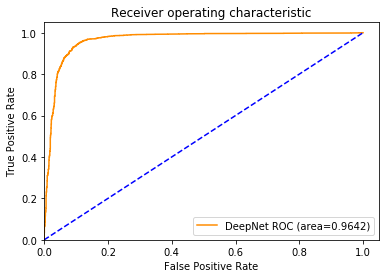

Area Under Curve	 0.964243386168


In [12]:
y_true = y_test
y_pred = np.array([prediction[i][1] for i in range(len(prediction))])

fpr, tpr, thres = roc_curve(y_true, y_pred)
auc = roc_auc_score(y_true, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', linestyle='-', label='DeepNet ROC (area=%0.4f)' % auc)
plt.plot([0,1],[0,1], color='blue', linestyle='--')
plt.xlim([0,1.05])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print('Area Under Curve\t', auc )
